# Introduction to regression analysis

![classification](../img/mlclass.png)

Regression and classification are both supervised learning methods, which means that they use labelled training data to train their models and make predictions. Therefore, those two tasks are often categorized under the same group in machine learning.

The main difference between them is the output variable. While in regression, the output is numerical or continuous, in classification, the output is categorical or discrete.

***

## What is regression?

Regression analysis is defined in Wikipedia as:

    In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the ‘outcome variable’) and one or more independent variables (often called ‘predictors’, ‘covariates’, or ‘features’).

The terminology you will often listen related to regression analysis is:

- Dependent variable or target variable: Variable to predict.
- Independent variable or predictor variable: Variables to estimate the dependent variable.
- Outlier: Observation that differs significantly from other observations. It should be avoided since it may hamper the result.
- Multicollinearity: Situation in which two or more independent variables are highly linearly related.
- Homoscedasticity or homogeneity of variance: Situation in which the error term is the same across all values of the independent variables.

Regression analysis is primarily used for two distinct purposes. First, it is widely used for prediction and forecasting, which overlaps with the field of machine learning. Second, it is also used to infer causal relationships between independent and dependent variables.

## Types of regression

There are various types of regressions which are used in data science and machine learning. Each type has its own importance on different scenarios, but at the core, all the regression methods analyze the effect of the independent variables on dependent variables. Here we mention some important types of regression:

1. Linear Regression
2. Polynomial Regression
3. Support Vector Regression
4. Decision Tree Regression
5. Random Forest Regression
6. Ridge Regression
7. Lasso Regression
8. Logistic Regression

***

### Choosing the correct regression model

The only way to know the best model is by trying out all of them and studying and comparing their individual performance on the data. Explaining each one of them in detail will be time expensive so we highlight a few.

**For this class, we will consider Linear regression**

Regression is the study of dependence — A Predictive modelling technique

1. It attempts to find the relationship between a DEPENDENT variable “Y” and an INDEPENDENT variable “X”.
(Note: Y should be a continuous variable while X can be categorical or continuous)
    
There are two types of linear regression — Simple Linear Regression and Multiple Linear Regression.
1. Simple linear regression will have one independent variable (predictor).
2. Multiple linear regression will have more than one independent variable (predictors).
   
In a nutshell — Linear Regression maps a continuous X to a continuous Y.

#### Multiple Linear Regression

$$ Y = b_0 + b_1*x_1 + b_2*x_2 + ...+ b_n*x_n$$

where
 - Y = Dependent variable and 
 - x1, x2, x3, …… xn = multiple independent variables
 - b0 is Y intercept
 - b1 to bn are slopes with respect to feature xi
 
In multple linear regression each coefficient is interpreted as the estimate change in Y corresponds to one unit change in a variable, when other variables held constant.

### How to find the best coefficients to determine Y ???
Two things we need to consider when we choose the coefficients, they are

1. The independent variable must have a strong correlation with the dependent variable.
2. The independent variable should not have a good correlation with any other independent variable.

So finally, the correlation between the independent and dependent variables must be high and the correlation between the independent variables must be low. Then those coefficients are fit for multiple linear regression.

### Performance Metrics

1. Coefficient Of Determination(R²)

It helps to understand which amount of variation in y can be explained by the dependence on x using the particular regression model. The R² value close to 1, the better the fit. It means, the model can better predict the output(y) for the input(x).

2. Root Mean Square Error(aka Root Mean Square Deviation)

Root Mean Square Error is the standard deviation of the residuals(prediction errors). Residuals are a measure of how far from the regression line data points are. The lower the RMSE value, the model would be fit well.

### Overfitting and Underfitting

1. Overfitting

Simply, it happens when the model learns the existing data too well. Complex models, which have many features, are often prone to overfitting. If the model is overfitted, the R² value would be low when using with new data.

2. Underfitting

When the model can’t accurately capture the dependencies among data, the underfitting will happen. It often yields a low R² with known data and bad generalization capabilities when applied with new data.

## Enough talk lets code!

In [12]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#### Libaries description

- NumPy is the fundamental package for scientific computing.
- The scikit-learn is a widely used python library for machine learning, built on top of NumPy and some other packages.
- Matplotlib is a Python 2D plotting library.
- The pandas library, easy-to-use data structures and data analysis tools for the python programming language.


#### Case study: Baseball Player

Goal: Predict the batting average

The dataset used for this Regression analysis is a baseball data of players performance. The dataset can be found <a href='https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html'>here</a>

Quick Description of the dataset features

A random sample of major league baseball players was obtained.

- X1 = batting average
- X2 = runs scored/times at bat
- X3 = doubles/times at bat
- X4 = triples/times at bat
- X5 = home runs/times at bat
- X6 = strike outs/times at bat

In [13]:
# Reading dataset
data_df = pd.read_excel('../data/baseball.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [14]:
data_df.head()

,X1,X2,X3,X4,X5,X6
0,0.283,0.144,0.049,0.012,0.013,0.086
1,0.276,0.125,0.039,0.013,0.002,0.062
2,0.281,0.141,0.045,0.021,0.013,0.074
3,0.328,0.189,0.043,0.001,0.030,0.032
4,0.290,0.161,0.044,0.011,0.070,0.076


In [15]:
data_df.describe()

,X1,X2,X3,X4,X5,X6
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,0.280467,0.150889,0.046356,0.011289,0.024267,0.104333
std,0.044002,0.042009,0.010452,0.006960,0.022260,0.063057
min,0.188000,0.064000,0.025000,0.001000,0.000000,0.000000
25%,0.248000,0.119000,0.039000,0.007000,0.009000,0.062000
50%,0.290000,0.150000,0.045000,0.009000,0.013000,0.095000
75%,0.308000,0.189000,0.053000,0.016000,0.039000,0.138000
max,0.367000,0.259000,0.068000,0.030000,0.085000,0.264000


In [16]:
#Seperating the target and pedicators
Y = data_df['X1']
X = data_df[['X2','X3','X4','X5','X6']]

### Splitting the datasets

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)

In train_test_split() function, we used test_size as 0.2, which means we use 20% of the data for testing and the remaining 80% for training.

### Model Building

In [7]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

    Coefficient
X2     0.518154
X3     1.027110
X4     0.518150
X5     0.175801
X6    -0.248293


In [8]:
y_pred = model.predict(X_test)

In [9]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
print(df.head(10))

    Actual  Predicted
30   0.243   0.233866
37   0.304   0.317188
27   0.318   0.333119
4    0.290   0.299402
10   0.269   0.276333
25   0.244   0.242289
28   0.207   0.239242
11   0.300   0.294018
38   0.297   0.290114


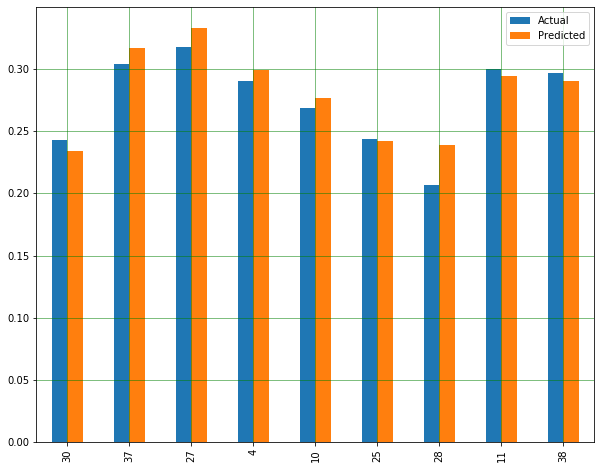

In [10]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [18]:
# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(Y_test, y_pred))      
r2_value = r2_score(Y_test, y_pred)                     

print("Intercept:", model.intercept_)
print("Root Mean Square Error", rmsd)
print("R^2 Value:", r2_value)

Intercept: 0.17165100673312103
Root Mean Square Error 0.013959349401614366
R^2 Value: 0.8356045255486351


Here the R² value is 0.8356 and RMSE score is 0.0139, which shows the model is almost accurate and can make good predictions. R² value can range from 0 to 1. As the R² value close to 1 and low RMSE is desired for the model will make better predictions